# Data Visualization
this notebook includes all the data visualization from the masterdata

In [45]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Load the data set from CSV
df = pd.read_csv('data/masterdata.csv')

# Take the important data only: T, at-Fe, at-Ni, at-Cr, at-Al, at-Cu, , SFE, and SFE_class
df = df[['T(K)', 'atFe', 'atNi', 'atCr', 'atAl', 'atCu', 'SFE', 'SFE_class' ]]

# Change the 'T(K)' into T_K, so there'll be no error occured when using that column, because parenthese as column name is prone to causing error
df.rename(columns = {'T(K)':'T_K'}, inplace = True)
df.head()

,T_K,atFe,atNi,atCr,atAl,atCu,SFE,SFE_class
0,1,5.0,23.75,23.75,23.75,23.75,51.190587,Medium
1,1,6.0,23.50,23.50,23.50,23.50,50.890054,Medium
2,1,7.0,23.25,23.25,23.25,23.25,50.560903,Medium
3,1,8.0,23.00,23.00,23.00,23.00,50.203349,Medium
4,1,9.0,22.75,22.75,22.75,22.75,49.817608,Medium


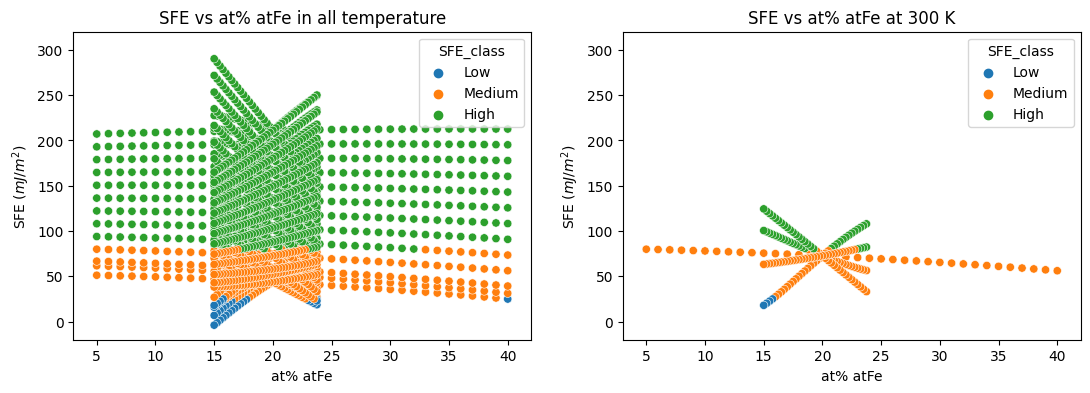

In [47]:
# Plot the correlation between at-X (X is element) with SFE values

# Data for each temperature
df_1 = df.query('T_K == 1')
df_100 = df.query('T_K == 100')
df_200 = df.query('T_K == 200')
df_300 = df.query('T_K == 300')
df_400 = df.query('T_K == 400')
df_500 = df.query('T_K == 500')
df_600 = df.query('T_K == 600')
df_700 = df.query('T_K == 700')
df_800 = df.query('T_K == 800')
df_900 = df.query('T_K == 900')
df_1000 = df.query('T_K == 1000')
df_1100 = df.query('T_K == 1100')
df_1200 = df.query('T_K == 1200')

# Function to Plot the graph
def plot_SFE_vs_element(element, data_specific_T, specific_T):
    
    plt.figure(figsize = (13,4))
    
    # All temperature
    
    plt.subplot(1,2,1)
    sns.scatterplot(data= df, x = element, y = 'SFE', 
                    hue='SFE_class', hue_order=['Low','Medium','High'], 
                    palette='tab10', linewidth=0.4
                   )
    plt.xlim(3, 42)
    plt.ylim(-20, 320)
               
    plt.xlabel( f'at% {element}', fontsize = 10, fontweight = 'normal')
    plt.ylabel( 'SFE ($mJ/m^2$)', fontsize = 10, fontweight = 'normal' )
    plt.title(f'SFE vs at% {element} in all temperature')        
    
    # Specific Temperature
               
    plt.subplot(1,2,2)
    sns.scatterplot(data= data_specific_T, x = element, y = 'SFE', 
                    hue='SFE_class', hue_order=['Low','Medium','High'], 
                    palette='tab10', linewidth=0.4
                   )
    plt.xlim(3, 42)
    plt.ylim(-20, 320)
               
    plt.xlabel( f'at% {element}', fontsize = 10, fontweight = 'normal')
    plt.ylabel( 'SFE ($mJ/m^2$)', fontsize = 10, fontweight = 'normal' )
    plt.title(f'SFE vs at% {element} at {specific_T} K')               


# Change the variable here
element = 'atFe'
data_specific_T = df_300
specific_T = 300

# plot
plot_SFE_vs_element(element, data_specific_T, specific_T)

Text(0.5, 1.0, 'SFE vs Temperature (K)')

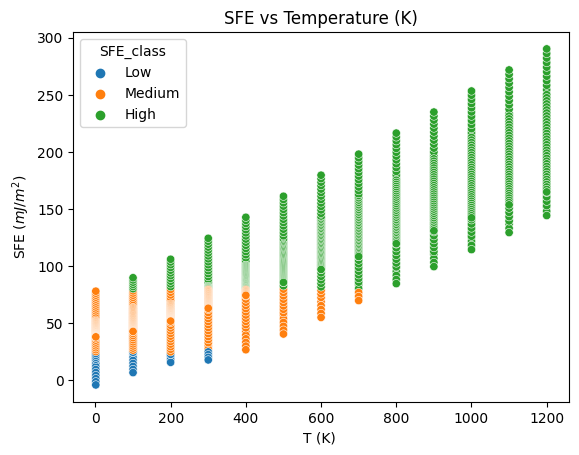

In [50]:
# Plot the correlation between T with SFE values
sns.scatterplot(data= df, x = 'T_K', y = 'SFE', 
                hue='SFE_class', hue_order=['Low','Medium','High'], 
                palette='tab10', linewidth=0.4
                )

plt.xlabel( 'T (K) ', fontsize = 10, fontweight = 'normal')
plt.ylabel( 'SFE ($mJ/m^2$)', fontsize = 10, fontweight = 'normal' )
plt.title(f'SFE vs Temperature (K)')    

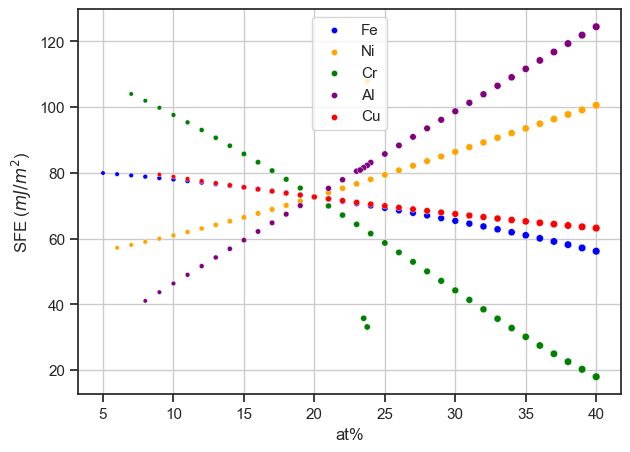

In [60]:
# In 300 K, increase of atomic percent of each Element effect on SFE

df_300 = df.query('T_K == 300')

h1 = df_300.iloc[0:36]
h2 = df_300.iloc[37:73]
h3 = df_300.iloc[74:110]
h4 = df_300.iloc[111:147]
h5 = df_300.iloc[148:184]

plt.figure(figsize=(7,5))
sns.set_theme(style="ticks")
plt.grid()

sns.scatterplot(x="atFe", y="SFE", data=h1, color="blue", label="Fe", size="atFe", sizes=(10,30), legend=False)
sns.scatterplot(x="atNi", y="SFE", data=h2, color="orange", label="Ni", size="atNi", sizes=(10,30), legend=False)
sns.scatterplot(x="atCr", y="SFE", data=h3, color="green", label="Cr", size="atCr", sizes=(10,30), legend=False)
sns.scatterplot(x="atAl", y="SFE", data=h4, color="purple", label="Al", size="atAl", sizes=(10,30), legend=False)
sns.scatterplot(x="atCu", y="SFE", data=h5, color="red", label="Cu", size="atCu", sizes=(10,30), legend=False)

plt.xlabel("at%",fontsize=12, fontweight='normal')
plt.ylabel("SFE ($mJ/m^2$)",fontsize=12, fontweight='normal')
# plt.title("Pengaruh penambahan unsur pada suhu kamar") #Fe   

plt.legend()